D:\anaconda\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


E:\data\oras5\somali-oras5\oras5_1979-2023_ptemp_500m.nc
40 82 0 44
start year:1979,end year:2023
是否画图? (请输入 yes 或 no): 
无效输入. 请回答 'yes' 或 'no'.
E:\data\en4\EN4_1980-2023_ptemp+salt.nc
10 21 0 11
start year:1980,end year:2023
是否画图? (请输入 yes 或 no): 
无效输入. 请回答 'yes' 或 'no'.
E:\data\oras5\somali-oras5\oras5_1979-2023_salt_100m.nc


D:\anaconda\Lib\site-packages\xarray\coding\times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


40 82 0 44
start year:1979,end year:2023
是否画图? (请输入 yes 或 no): 
无效输入. 请回答 'yes' 或 'no'.
E:\data\en4\EN4_1980-2023_ptemp+salt.nc
10 21 0 11
start year:1980,end year:2023
是否画图? (请输入 yes 或 no): 
无效输入. 请回答 'yes' 或 'no'.
en4: Coordinates:
  * time     (time) int32 1 2 3 4 5 6 7 8 9 10 11 12
  * LEV      (LEV) float64 5.022 15.08 25.16 35.28 ... 66.04 76.55 87.27 98.31
oras: Coordinates:
  * time     (time) int32 1 2 3 4 5 6 7 8 9 10 11 12
  * LEV      (LEV) float32 0.5058 1.556 2.668 3.856 ... 69.02 77.61 86.93 97.04
en4_salt: Coordinates:
  * time     (time) int32 1 2 3 4 5 6 7 8 9 10 11 12
  * LEV      (LEV) float64 5.022 15.08 25.16 35.28 ... 66.04 76.55 87.27 98.31
oras_salt: Coordinates:
  * time     (time) int32 1 2 3 4 5 6 7 8 9 10 11 12
  * LEV      (LEV) float32 0.5058 1.556 2.668 3.856 ... 69.02 77.61 86.93 97.04


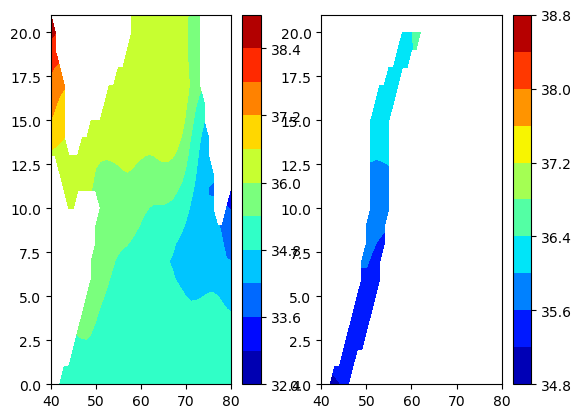

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import function
import matplotlib.colors as mcolors
from netCDF4 import Dataset
'''统一经纬度，用xarray来显示net_flux'''
latitude=np.arange(0.0, 20.30, 0.247)
longitude=np.arange(40.0, 65.25, 0.25)
file="E:\data\oras5\somali-oras5\oras5_1979-2023_ptemp_500m.nc";print(file)
ds= xr.open_dataset(file)
ds= list(ds.data_vars.values())[0]#选定变量
ds=ds.sel(LEV=slice(0,200))
ds=ds+function.make_mask4D(ds,5/(ds.latitude.data[1]-ds.latitude.data[0]))#mask
ds=function.years_to_year4D(ds)#气候态
mask=0*ds.sel(LEV=ds.LEV[0],time=ds.time[0])
#经向纬向平均，只留下LEV和time
da=ds;mask_path=da;var_name='ocean temperature';color='jet';lev_end=130;lat_min=0;lat_max=20;var_min=19;varmax=33;color_freq=11
oras=function.weight_lon_and_lat4D(da,mask_path,var_name,color,lev_end,lat_min,lat_max,var_min, varmax, color_freq)

file="E:\data\en4\EN4_1980-2023_ptemp+salt.nc";print(file)
ds= xr.open_dataset(file);ds=ds.temp
ds=ds+function.make_mask4D(ds,5/(ds.latitude.data[1]-ds.latitude.data[0]))#mask
ds=function.years_to_year4D(ds)#气候态
#经向纬向平均，只留下LEV和time
da=ds;mask_path=da;var_name='ocean temperature';color='jet';lev_end=130;lat_min=0;lat_max=19;var_min=19;varmax=32;color_freq=11
en4=function.weight_lon_and_lat4D(da,mask_path,var_name,color,lev_end,lat_min,lat_max,var_min, varmax, color_freq)

file="E:\data\oras5\somali-oras5\oras5_1979-2023_salt_100m.nc";print(file)
ds= xr.open_dataset(file)
ds= list(ds.data_vars.values())[0]#选定变量
ds= xr.DataArray(ds.data, coords=[ds.time_counter,ds.deptht,latitude,longitude],dims=['time','LEV', 'latitude','longitude'])
ds=ds+function.make_mask4D(ds,5/(ds.latitude.data[1]-ds.latitude.data[0]))#mask
ds=function.years_to_year4D(ds)#气候态
#经向纬向平均，只留下LEV和time
da=ds;mask_path=da;var_name='ocean salinity';color='jet';lev_end=130;lat_min=0;lat_max=19;var_min=19;varmax=32;color_freq=11
oras_salt=function.weight_lon_and_lat4D(da,mask_path,var_name,color,lev_end,lat_min,lat_max,var_min, varmax, color_freq)

file="E:\data\en4\EN4_1980-2023_ptemp+salt.nc";print(file)
ds= xr.open_dataset(file);ds=ds.salt
ds=ds+function.make_mask4D(ds,5/(ds.latitude.data[1]-ds.latitude.data[0]))#mask
ds=function.years_to_year4D(ds)#气候态
#经向纬向平均，只留下LEV和time
da=ds;mask_path=da;var_name='ocean temperature';color='jet';lev_end=130;lat_min=0;lat_max=19;var_min=19;varmax=32;color_freq=11
en4_salt=function.weight_lon_and_lat4D(da,mask_path,var_name,color,lev_end,lat_min,lat_max,var_min, varmax, color_freq)

# 假设您有4个变量，每个变量都是一个二维数组
variables = {"en4":en4.T-273.15,
             "oras":oras.T,
             "en4_salt":en4_salt.T,
             "oras_salt":oras_salt.T
            }
key=["en4","oras","en4_salt","oras_salt"]
new_time_values = [1,2,3,4,5,6,7,8,9,10,11,12]
da_updated={}
for i in key:
    da =variables[i]
    #print(da.coords)
    da_updated[i] = da.assign_coords(time=new_time_values).sel(LEV=slice(0,100))
    print(f"{i}: {da_updated[i].coords}")
variables=da_updated

file="E:\\data\\oras5\\somali-oras5\\cycle mld\\oras5_opa4_vs-surface_data_0.14ild&mlt&5T_n&0.15mld.nc"
#"E:\data\oras5\somali-oras5\oras5_mld&ild&mlt&T_n&mlu&mlv_climate.nc"
new_time_values = [1,2,3,4,5,6,7,8,9,10,11,12]
ds0 = xr.open_dataset(file)
mld = ds0['mld'].sel(latitude=slice(0,20));ild = ds0['ild'].sel(latitude=slice(0,20))#+mask
ild_weight=ild.mean(("latitude")).assign_coords(time=new_time_values)
mld_weight=mld.mean(("latitude")).assign_coords(time=new_time_values)

file="E:\data\en4\en4_ild0.15&mld0.32.nc"
new_time_values = [1,2,3,4,5,6,7,8,9,10,11,12]
ds0 = xr.open_dataset(file)
en4_mld = ds0['mld'].sel(latitude=slice(0,20));en4_ild = ds0['ild'].sel(latitude=slice(0,20))
en4_ild_weight=en4_ild.mean(("latitude")).assign_coords(time=new_time_values)
en4_mld_weight=en4_mld.mean(("latitude")).assign_coords(time=new_time_values)

[Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, ''),
 Text(10, 0, ''),
 Text(11, 0, ''),
 Text(12, 0, '')]

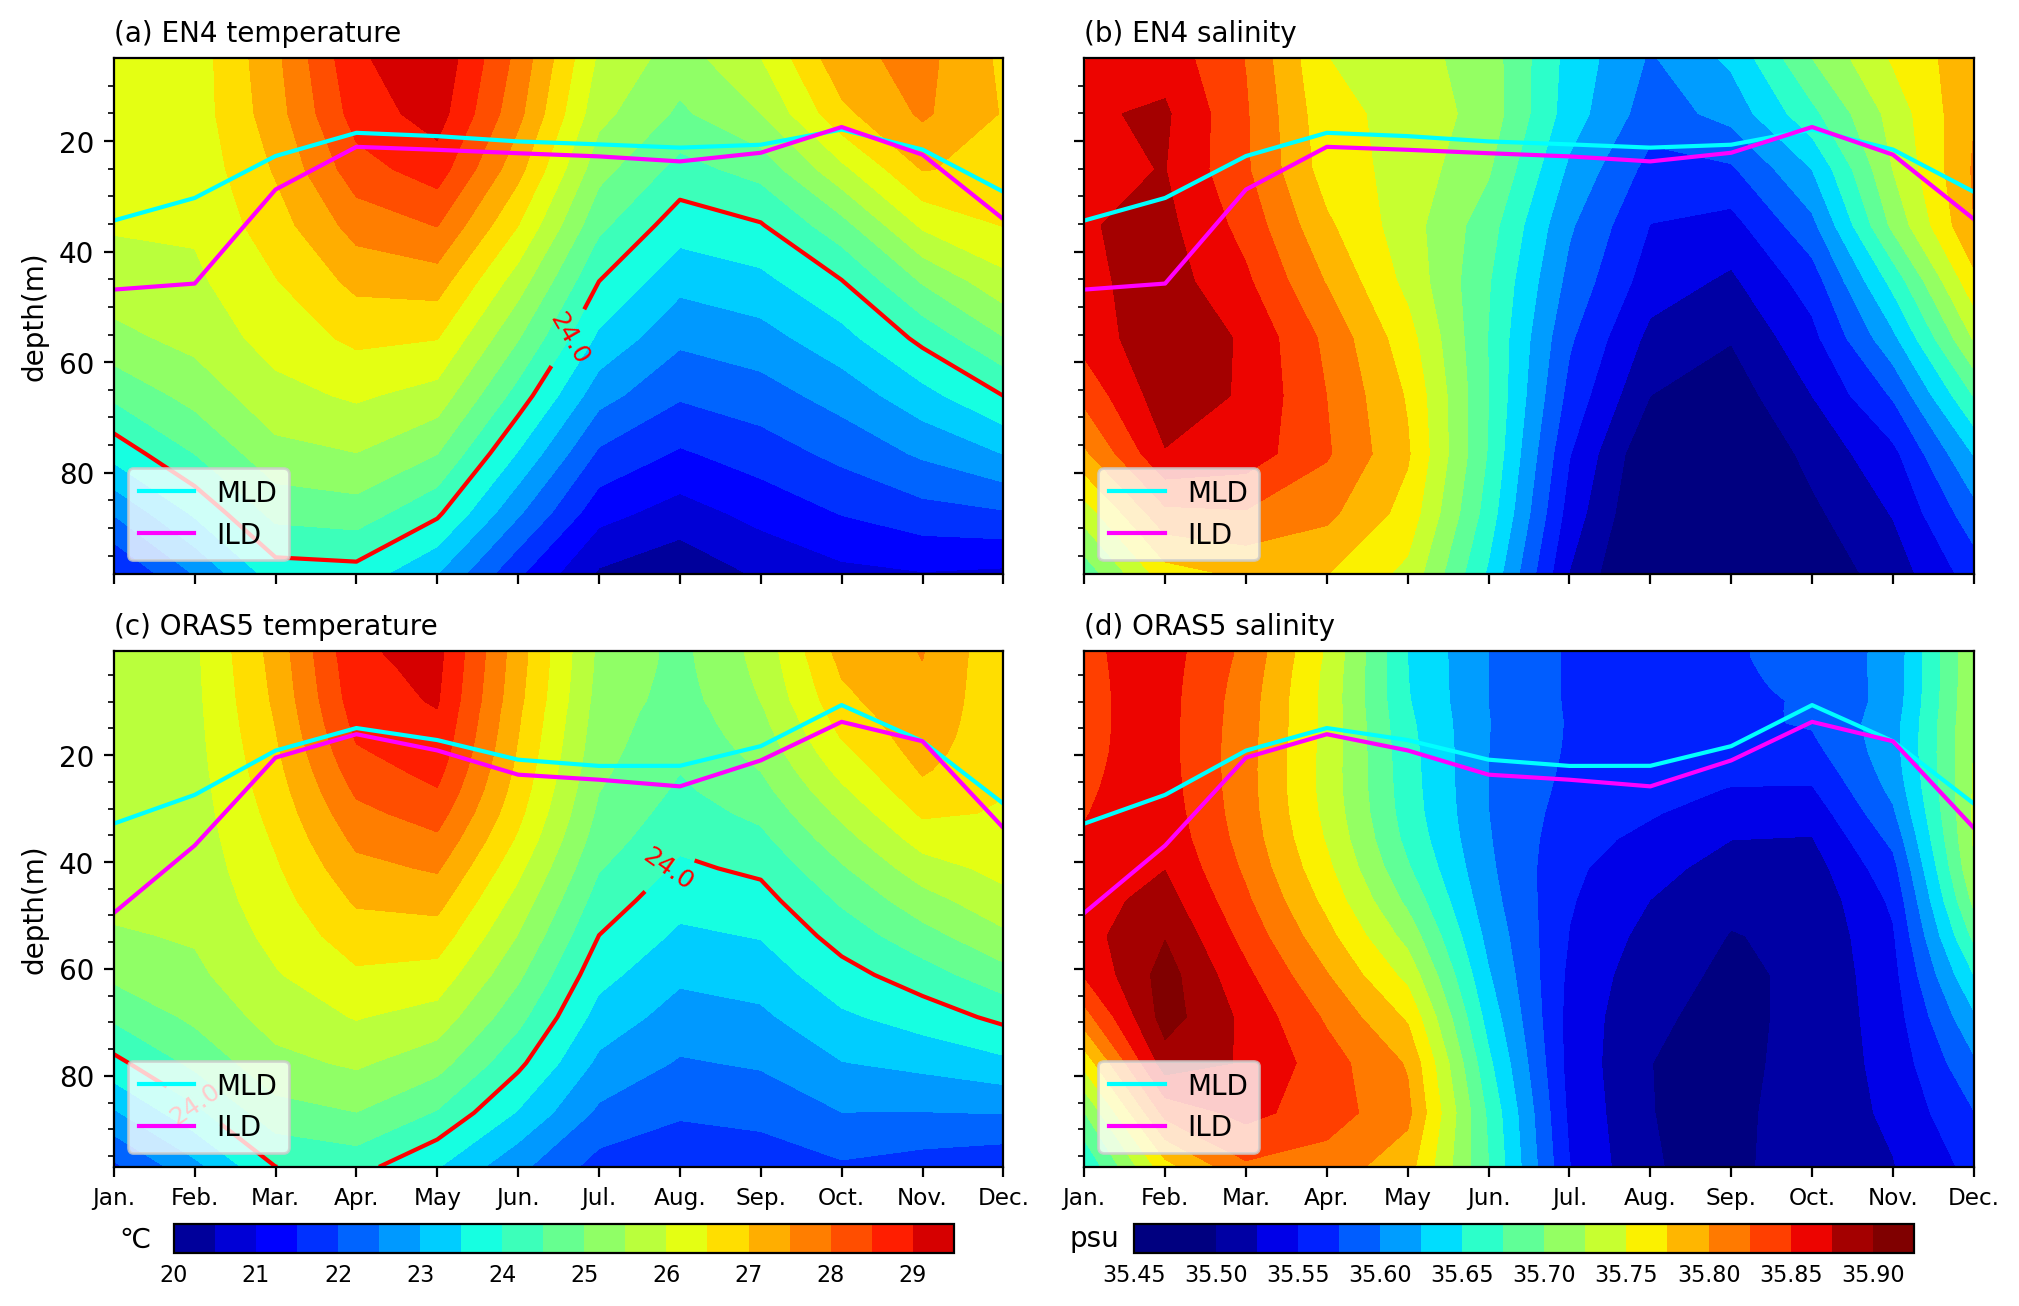

In [58]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(12,7.2),  dpi=200,#sharey=True,
                        constrained_layout=True)
gs = gridspec.GridSpec(17,4)#(4, 9)

# 定义不同大小的Axes
ax1 = fig.add_subplot(gs[:8, 0:2])  # 占据第一行的前两列
ax3 = fig.add_subplot(gs[:8, 2:4])   # 占据第一行的最后一列
ax2 = fig.add_subplot(gs[9:17, 0:2])   # 占据第二行的第一列
ax4 = fig.add_subplot(gs[9:17, 2:4])   # 占据第二行的第二列

# 共享的颜色条范围
key=["en4","oras","en4_salt","oras_salt"]
vmin = 20#min(var.min() for var in variables)
vmax = 30#max(var.max() for var in variables)
i=0;j=0
cf = ax1.contourf(variables[key[i+j]].time,variables[key[i+j]].LEV,variables[key[i+j]], cmap='jet',
                  vmin=vmin, vmax=vmax,levels=np.arange(20,30,0.5))
df = ax1.contour(variables[key[i+j]].time,variables[key[i+j]].LEV,variables[key[i+j]], colors='r',
                 vmin=vmin, vmax=vmax, levels=[24])
af = ax1.contour(variables[key[i+j]].time,variables[key[i+j]].LEV,variables[key[i+j]], colors='gray',alpha=0.0,
                 vmin=vmin, vmax=vmax, levels=[20,21,22,23,25,26,27,28,29])
plt.clabel(df, inline=True, fontsize=9, fmt='%1.1f')
plt.clabel(af, inline=True, fontsize=9, fmt='%1.1f')
ax1.set_title(f'(a) EN4 temperature ',loc='left',fontsize=10)
ax1.plot(en4_mld_weight.time,en4_mld_weight,label='MLD',color='cyan')
ax1.plot(en4_ild_weight.time,en4_ild_weight,label='ILD',color='fuchsia')
ax1.legend();#ax1.set_xticks([])
ax1.invert_yaxis()
i=1;j=0
cf = ax2.contourf(variables[key[i+j]].time,variables[key[i+j]].LEV,variables[key[i+j]], cmap='jet',
                  vmin=vmin, vmax=vmax,levels=np.arange(20,30,0.5))
df = ax2.contour(variables[key[i+j]].time,variables[key[i+j]].LEV,variables[key[i+j]], colors='r',
                 vmin=vmin, vmax=vmax, levels=[24])
af = ax2.contour(variables[key[i+j]].time,variables[key[i+j]].LEV,variables[key[i+j]], colors='gray',alpha=0.0,
                 vmin=vmin, vmax=vmax, levels=[20,21,22,23,25,26,27,28,29])
plt.clabel(df, inline=True, fontsize=9, fmt='%1.1f')
plt.clabel(af, inline=True, fontsize=9, fmt='%1.1f')
ax2.set_title(f'(c) ORAS5 temperature ',loc='left',fontsize=10)
position=fig.add_axes([0.15, 0.05, 0.325, 0.02])#位置[左,下,宽,高]
cb=fig.colorbar(cf,cax=position,label='℃',orientation='horizontal');
cb.ax.tick_params(length=0);cb.ax.tick_params(labelsize=8)
cb.ax.xaxis.set_label_coords(-0.05, 0.5);cb.set_label('℃', rotation=0, va="center", ha="center")
ax2.plot(mld_weight.time,mld_weight,label='MLD',color="cyan")#'cyan')
ax2.plot(ild_weight.time,ild_weight,label='ILD',color='fuchsia')
ax2.legend()
ax2.invert_yaxis()
vmin = 35.5#min(var.min() for var in variables)
vmax = 35.9#max(var.max() for var in variables)
i=0;j=1
cf = ax3.contourf(variables[key[i+j+1]].time,variables[key[i+j+1]].LEV,variables[key[i+j+1]], cmap='jet', 
                  vmin=vmin, vmax=vmax,levels=np.arange(35.45,35.95,0.025))
af = ax3.contour(variables[key[i+j+1]].time,variables[key[i+j+1]].LEV,variables[key[i+j+1]],colors='gray',alpha=0,
                 vmin=vmin, vmax=vmax, levels=np.arange(35.45,35.95,0.05))
plt.clabel(af, inline=True, fontsize=9, fmt='%1.1f')
ax3.set_title(f'(b) EN4 salinity ',loc='left',fontsize=10)
ax3.plot(en4_mld_weight.time,en4_mld_weight,label='MLD',color='cyan')
ax3.plot(en4_ild_weight.time,en4_ild_weight,label='ILD',color='fuchsia')
ax3.legend();#ax3.set_xticks([]);#ax3.set_yticks([])

ax3.invert_yaxis()
i=1;j=1
cf = ax4.contourf(variables[key[i+j+1]].time,variables[key[i+j+1]].LEV,variables[key[i+j+1]], cmap='jet', 
                  vmin=vmin, vmax=vmax,levels=np.arange(35.45,35.95,0.025))
af = ax4.contour(variables[key[i+j+1]].time,variables[key[i+j+1]].LEV,variables[key[i+j+1]], colors='gray',alpha=0,
                 vmin=vmin, vmax=vmax, levels=np.arange(35.45,35.95,0.05))
plt.clabel(af, inline=True, fontsize=9, fmt='%1.2f')
ax4.set_title(f'(d) ORAS5 salinity',loc='left',fontsize=10)
position=fig.add_axes([0.55, 0.05, 0.325, 0.02])#位置[左,下,宽,高]
cb=fig.colorbar(cf,cax=position,label='psu',orientation='horizontal');
cb.ax.tick_params(length=0);cb.ax.tick_params(labelsize=8)
cb.ax.xaxis.set_label_coords(-0.05, 0.5);cb.set_label('psu', rotation=0, va="center", ha="center")
ax4.plot(mld_weight.time,mld_weight,label='MLD',color="cyan")#'cyan')
ax4.plot(ild_weight.time,ild_weight,label='ILD',color='fuchsia')
ax4.legend();#ax4.set_yticks([])
ax4.invert_yaxis()
ax4.set_xlabel('  ');ax3.set_xlabel('   ')
ax4.set_xticks(np.arange(1, 13, 1));ax2.set_xticks(np.arange(1, 13, 1));
ax4.set_xticklabels(['Jan.','Feb.','Mar.','Apr.','May','Jun.','Jul.','Aug.','Sep.','Oct.','Nov.','Dec.'] ,fontsize = 'small')
ax2.set_xticklabels(['Jan.','Feb.','Mar.','Apr.','May','Jun.','Jul.','Aug.','Sep.','Oct.','Nov.','Dec.'] ,fontsize = 'small')
ax1.set_ylabel('depth(m)');ax2.set_ylabel('depth(m)')

ax1.set_xticks(np.arange(1, 13, 1))  # 主刻度每 1 单位
ax1.minorticks_on()# 启用次刻度
ax1.xaxis.set_minor_formatter(plt.NullFormatter());ax1.xaxis.set_minor_locator(plt.NullLocator())# 隐藏 y轴的次网格线
ax2.minorticks_on()# 启用次刻度
ax2.xaxis.set_minor_formatter(plt.NullFormatter());ax2.xaxis.set_minor_locator(plt.NullLocator())# 隐藏 y轴的次网格线
ax3.set_xticks(np.arange(1, 13, 1))  # 主刻度每 1 单位
ax3.minorticks_on()# 启用次刻度
ax3.xaxis.set_minor_formatter(plt.NullFormatter());ax3.xaxis.set_minor_locator(plt.NullLocator())# 隐藏 y轴的次网格线
ax4.minorticks_on()# 启用次刻度
ax4.xaxis.set_minor_formatter(plt.NullFormatter());ax4.xaxis.set_minor_locator(plt.NullLocator())# 隐藏 y轴的次网格线
# 隐藏所有刻度标签
ax3.xaxis.set_ticklabels([])
ax3.yaxis.set_ticklabels([])
ax4.yaxis.set_ticklabels([])
ax1.xaxis.set_ticklabels([])
